<a href="https://colab.research.google.com/github/h8erqqq/ML/blob/main/LW5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

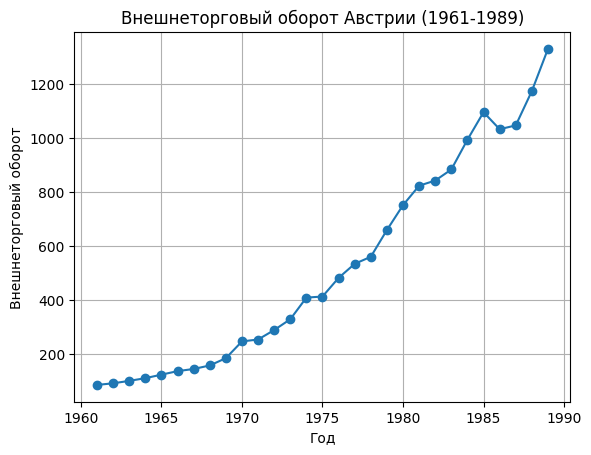

In [22]:
import matplotlib.pyplot as plt

years = list(range(1961, 1990)) #года из варианта
turnover = [87, 93, 102, 112, 125, 138, 146, 159, 186, 248, 255, 290, 330, 410, 414, 483, 535, 561, 660, 752, 824, 843, 884, 994, 1096, 1033, 1047, 1174, 1330] #аналогичнго оборот

plt.plot(years, turnover, marker='o')
plt.title('Внешнеторговый оборот Австрии (1961-1989)')
plt.xlabel('Год')
plt.ylabel('Внешнеторговый оборот')
plt.grid(True)
plt.show()


График динамики внешнеторгового оборота

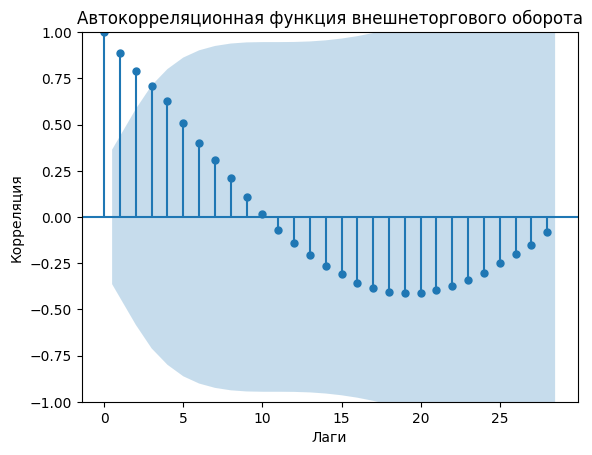

In [23]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

acf_result = sm.tsa.acf(turnover, fft=False)
plot_acf(turnover, lags=len(turnover)-1)
plt.title('Автокорреляционная функция внешнеторгового оборота')
plt.xlabel('Лаги')
plt.ylabel('Корреляция')
plt.show()



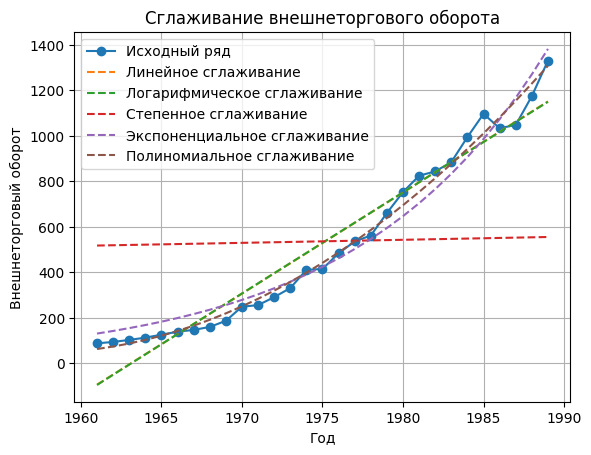

In [63]:
from scipy.optimize import curve_fit
import numpy as np

# Линейное сглаживание
def linear_func(x, a, b):
    return a * x + b

popt_linear, _ = curve_fit(linear_func, years, turnover)
turnover_linear = linear_func(np.array(years), *popt_linear)

# Логарифмическое сглаживание
def log_func(x, a, b):
    return a * np.log(x) + b

popt_log, _ = curve_fit(log_func, years, turnover)
turnover_log = log_func(np.array(years), *popt_log)

# Степенное сглаживание
def power_func(x, a, b):
    return a * np.power(x, b)

popt_power, _ = curve_fit(power_func, years, turnover, method='dogbox', maxfev=20000)
turnover_power = power_func(np.array(years), *popt_power)

# Экспоненциальное сглаживание
def exp_func(x, a, b):
    return a * np.exp(b * x)

p0_exp = [1.0, 0.01]  # Пример начальных параметров, можно подбирать
popt_exp, _ = curve_fit(exp_func, years, turnover, p0=p0_exp, maxfev=20000)
turnover_exp = exp_func(np.array(years), *popt_exp)

# Полиномиальное сглаживание
def poly_func(x):
    return np.polyval(coeff_poly, x)

coeff_poly = np.polyfit(years, turnover, deg=2)
turnover_poly = np.polyval(coeff_poly, years)

# Построение графика с различными сглаживаниями
plt.plot(years, turnover, label='Исходный ряд', marker='o')
plt.plot(years, turnover_linear, label='Линейное сглаживание', linestyle='--')
plt.plot(years, turnover_log, label='Логарифмическое сглаживание', linestyle='--')
plt.plot(years, turnover_power, label='Степенное сглаживание', linestyle='--')
plt.plot(years, turnover_exp, label='Экспоненциальное сглаживание', linestyle='--')
plt.plot(years, turnover_poly, label='Полиномиальное сглаживание', linestyle='--')
plt.title('Сглаживание внешнеторгового оборота')
plt.xlabel('Год')
plt.ylabel('Внешнеторговый оборот')
plt.legend()
plt.grid(True)
plt.show()


Существуют значительные положительные корреляции на многих лагах. Это указывает на наличие тренда в данных, так как последовательные значения ряда тесно связаны друг с другом.

In [64]:
from sklearn.metrics import r2_score

# Функция для вычисления R-squared
def calculate_r_squared(y_true, y_pred):
    return r2_score(y_true, y_pred)

# Сравнение коэффициента детерминации для различных моделей
r_squared_linear = calculate_r_squared(turnover, turnover_linear)
r_squared_log = calculate_r_squared(turnover, turnover_log)
r_squared_power = calculate_r_squared(turnover, turnover_power)
r_squared_exp = calculate_r_squared(turnover, turnover_exp)
r_squared_poly = calculate_r_squared(turnover, turnover_poly)

print(f"R-squared для линейного сглаживания: {r_squared_linear}")
print(f"R-squared для логарифмического сглаживания: {r_squared_log}")
print(f"R-squared для степенного сглаживания: {r_squared_power}")
print(f"R-squared для экспоненциального сглаживания: {r_squared_exp}")
print(f"R-squared для полиномиального сглаживания: {r_squared_poly}")


R-squared для линейного сглаживания: 0.948051285017844
R-squared для логарифмического сглаживания: 0.947298462889934
R-squared для степенного сглаживания: 0.05603569986765333
R-squared для экспоненциального сглаживания: 0.9701266107371336
R-squared для полиномиального сглаживания: 0.9894257041508364


Полиномиальное сглаживание оказывается наиболее подходящим

In [65]:
from statsmodels.stats.stattools import durbin_watson

# Оценка остатков
residuals = turnover - turnover_poly

# Критерий Дарбина-Уотсона
d_w_statistic = durbin_watson(residuals)
print(f"Статистика Дарбина-Уотсона: {d_w_statistic}")


Статистика Дарбина-Уотсона: 1.0155442290899086


Это значение меньше 2, что указывает на наличие положительной автокорреляции в остатках. Таким образом, остатки не являются полностью случайными, что может свидетельствовать о том, что в модели не учтены некоторые важные факторы или закономерности временного ряда.

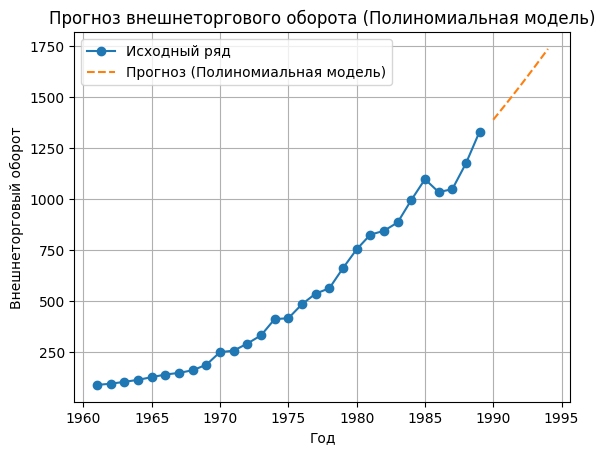

In [66]:
# Прогноз на 5 периодов
future_years = list(range(1990, 1995))
future_turnover_poly = poly_func(future_years)

# Построение графика с прогнозом
plt.plot(years, turnover, label='Исходный ряд', marker='o')
plt.plot(future_years, future_turnover_poly, label='Прогноз (Полиномиальная модель)', linestyle='--')
plt.title('Прогноз внешнеторгового оборота (Полиномиальная модель)')
plt.xlabel('Год')
plt.ylabel('Внешнеторговый оборот')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
# Функция для вычисления значений полинома
def polynomial_func(x, coefficients):
    return np.polyval(coefficients, x)

# Прогноз на 5 периодов вперед
future_years = list(range(1990, 1995))
future_turnover = polynomial_func(future_years, coeff_poly)

# Вывод результатов прогноза
for year, turnover_pred in zip(future_years, future_turnover):
    print(f"Прогноз на {year}: {turnover_pred:.2f}")



Прогноз на 1990: 1387.99
Прогноз на 1991: 1471.03
Прогноз на 1992: 1556.57
Прогноз на 1993: 1644.58
Прогноз на 1994: 1735.09
